In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd

In [4]:
day = pd.read_csv('Downloads\day.csv')

In [5]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
day.shape

(730, 16)

In [7]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 88.5+ KB


In [8]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [9]:
day_check = day[['casual','registered','cnt']]
day_check['total'] = day_check['casual'] + day_check['registered']

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

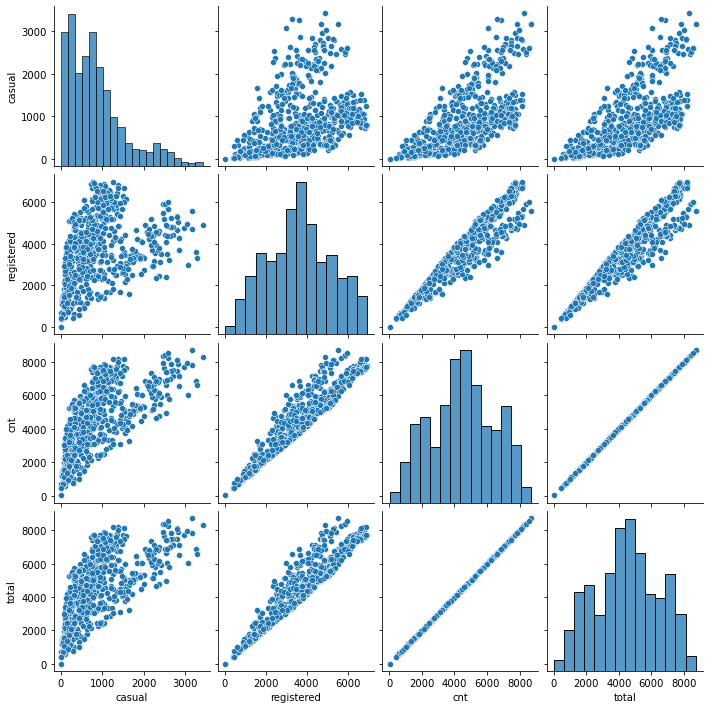

In [11]:
sns.pairplot(day_check)
plt.show()

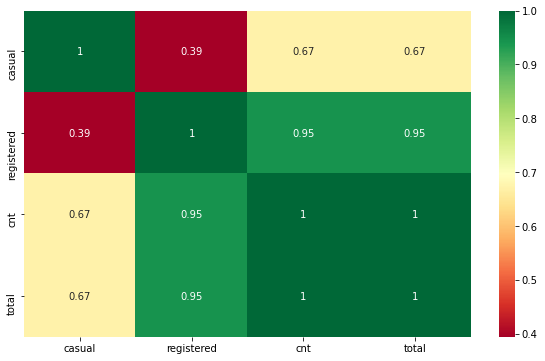

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(day_check.corr(),annot=True,cmap='RdYlGn')
plt.show()

In [13]:
day.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [14]:
day.shape


(730, 12)

In [15]:
day.season.replace((1,2,3,4), ('W1_Spring','W2_Summer','W3_Fall','W4_Winter'), inplace=True)
day.season.value_counts()

W3_Fall      188
W2_Summer    184
W1_Spring    180
W4_Winter    178
Name: season, dtype: int64

In [16]:
day.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
day.mnth.value_counts()

Aug    62
Mar    62
Jan    62
May    62
Oct    62
Jul    62
Dec    62
Apr    60
Jun    60
Nov    60
Sep    60
Feb    56
Name: mnth, dtype: int64

In [17]:
day.weathersit.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)
day.weathersit.value_counts()

Clear             463
Misty             246
Light_rainsnow     21
Name: weathersit, dtype: int64

In [18]:
day.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
day.weekday.value_counts()

Monday       105
Tuesday      105
Saturday     104
Friday       104
Thursday     104
Sunday       104
Wednesday    104
Name: weekday, dtype: int64

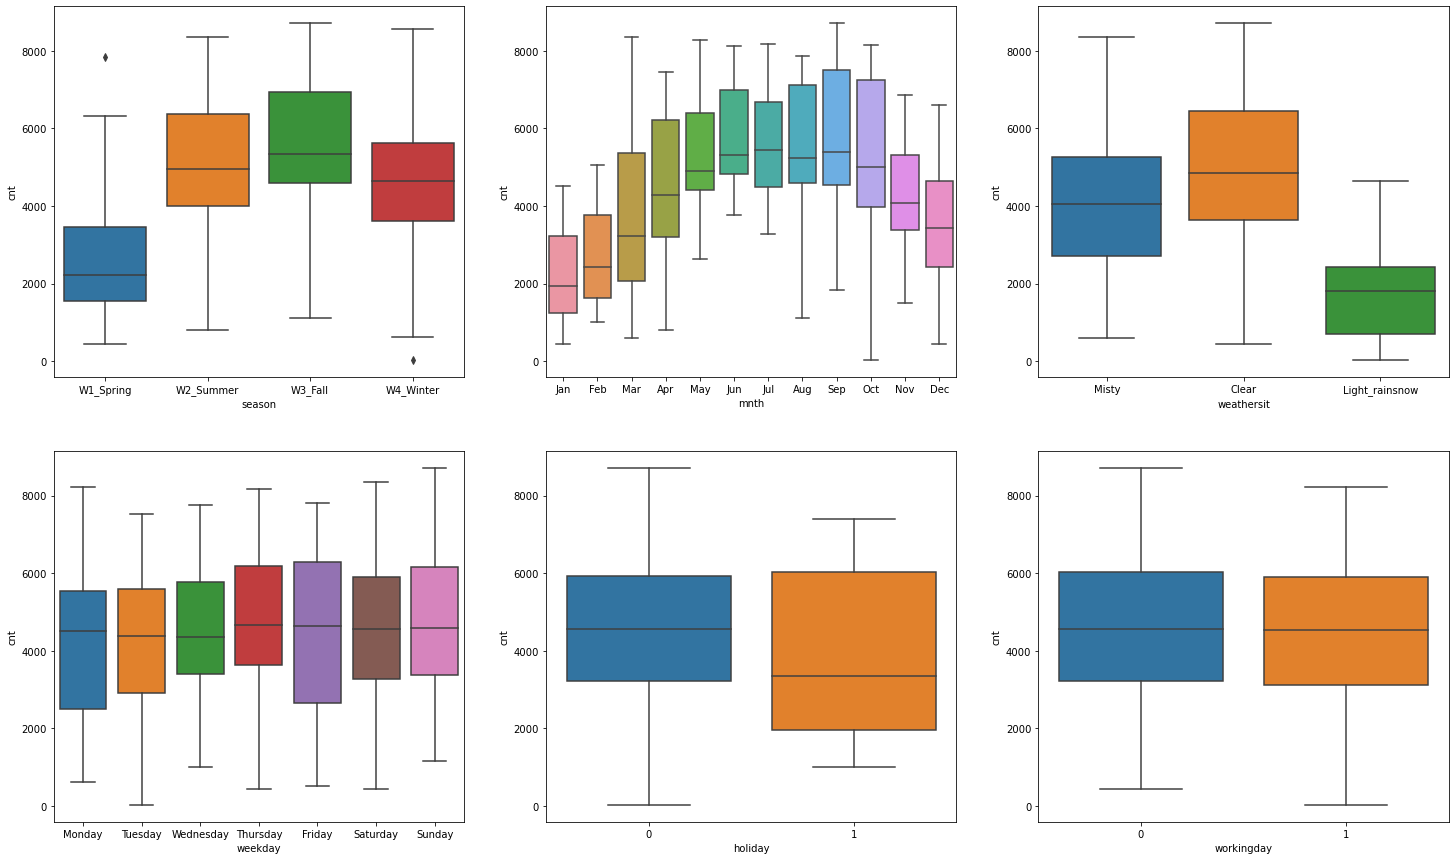

In [76]:
plt.figure(figsize=(25, 15))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = day)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = day)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = day)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = day)
plt.subplot(2,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = day)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = day)
plt.show()

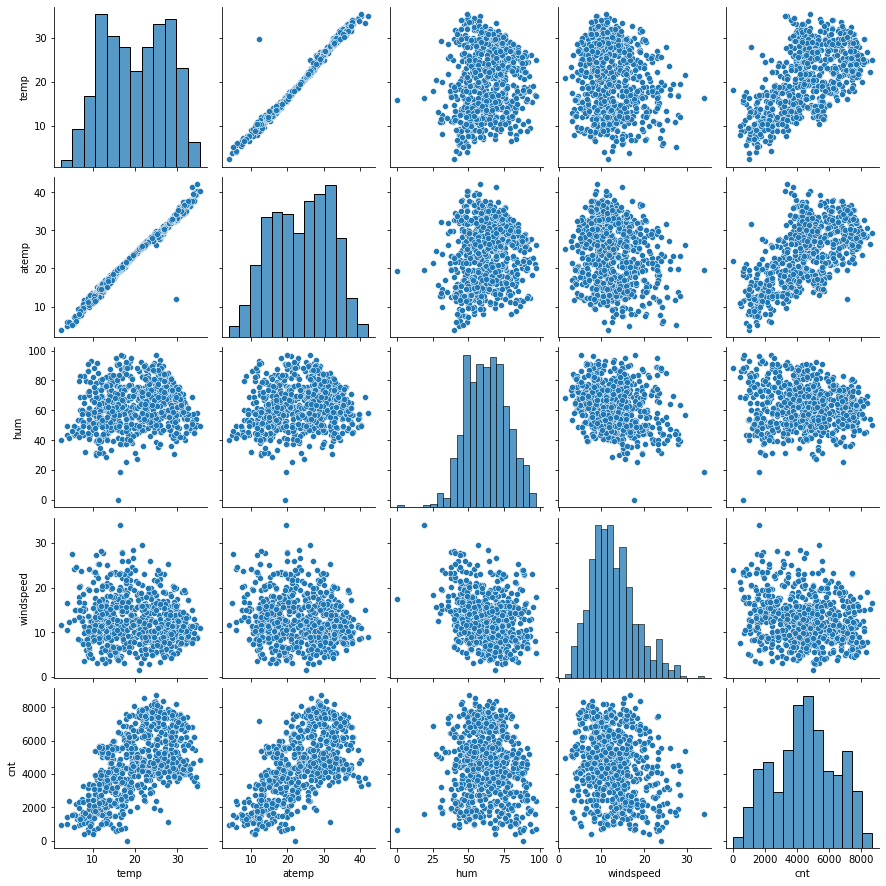

In [20]:
day_num = day[['temp','atemp','hum','windspeed','cnt']]
sns.pairplot(day_num)
plt.show()

<AxesSubplot:>

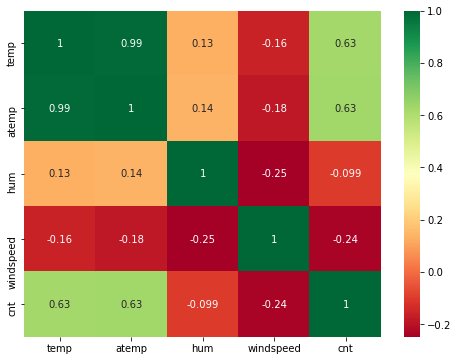

In [21]:
plt.figure(figsize=(8,6))
sns.heatmap(day_num.corr(), annot = True, cmap="RdYlGn")

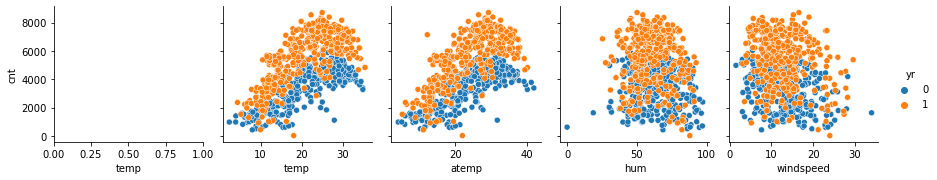

In [22]:
sns.pairplot(x_vars=[ 'temp','temp', 'atemp', 'hum', 'windspeed'], y_vars=['cnt'],data=day,hue='yr')
plt.show()

In [78]:
season = pd.get_dummies(day['season'], drop_first = True)
season.head()

,W2_Summer,W3_Fall,W4_Winter
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [24]:
weather = pd.get_dummies(day['weathersit'], drop_first = True)
weather.head(3)

,Light_rainsnow,Misty
0,0,1
1,0,1
2,0,0


In [25]:
month = pd.get_dummies(day['mnth'], drop_first = True)
month.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [26]:
weekday=pd.get_dummies(day['weekday'],drop_first=True)
weekday.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [27]:
day_new=pd.concat([day,season,month,weather,weekday], axis = 1)
day_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,W1_Spring,0,Jan,0,Monday,1,Misty,14.110847,18.18125,80.5833,...,0,0,0,1,1,0,0,0,0,0
1,W1_Spring,0,Jan,0,Tuesday,1,Misty,14.902598,17.68695,69.6087,...,0,0,0,1,0,0,0,0,1,0
2,W1_Spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,0,0,1
3,W1_Spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,1,0,0
4,W1_Spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [28]:
day_new.drop(['season','mnth','weekday','weathersit'],axis=1,inplace=True)

In [29]:
day_new.shape

(730, 30)

In [30]:
day_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   hum             730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   W2_Summer       730 non-null    uint8  
 9   W3_Fall         730 non-null    uint8  
 10  W4_Winter       730 non-null    uint8  
 11  Aug             730 non-null    uint8  
 12  Dec             730 non-null    uint8  
 13  Feb             730 non-null    uint8  
 14  Jan             730 non-null    uint8  
 15  Jul             730 non-null    uint8  
 16  Jun             730 non-null    uint8  
 17  Mar             730 non-null    uin

In [31]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [32]:
day_train,day_test=train_test_split(day_new,train_size=0.7,test_size=0.3,random_state=100)
day_train.shape

(510, 30)

In [33]:
day_test.shape

(219, 30)

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
scaler=MinMaxScaler()

In [36]:
num_vars=['temp','atemp','hum','windspeed','cnt']
day_train[num_vars]=scaler.fit_transform(day_train[num_vars])

In [37]:
day_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,W2_Summer,W3_Fall,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,0,0,0,0,0,0,1
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,1,0,0,1,0,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,1,0,0,1,0,0,0


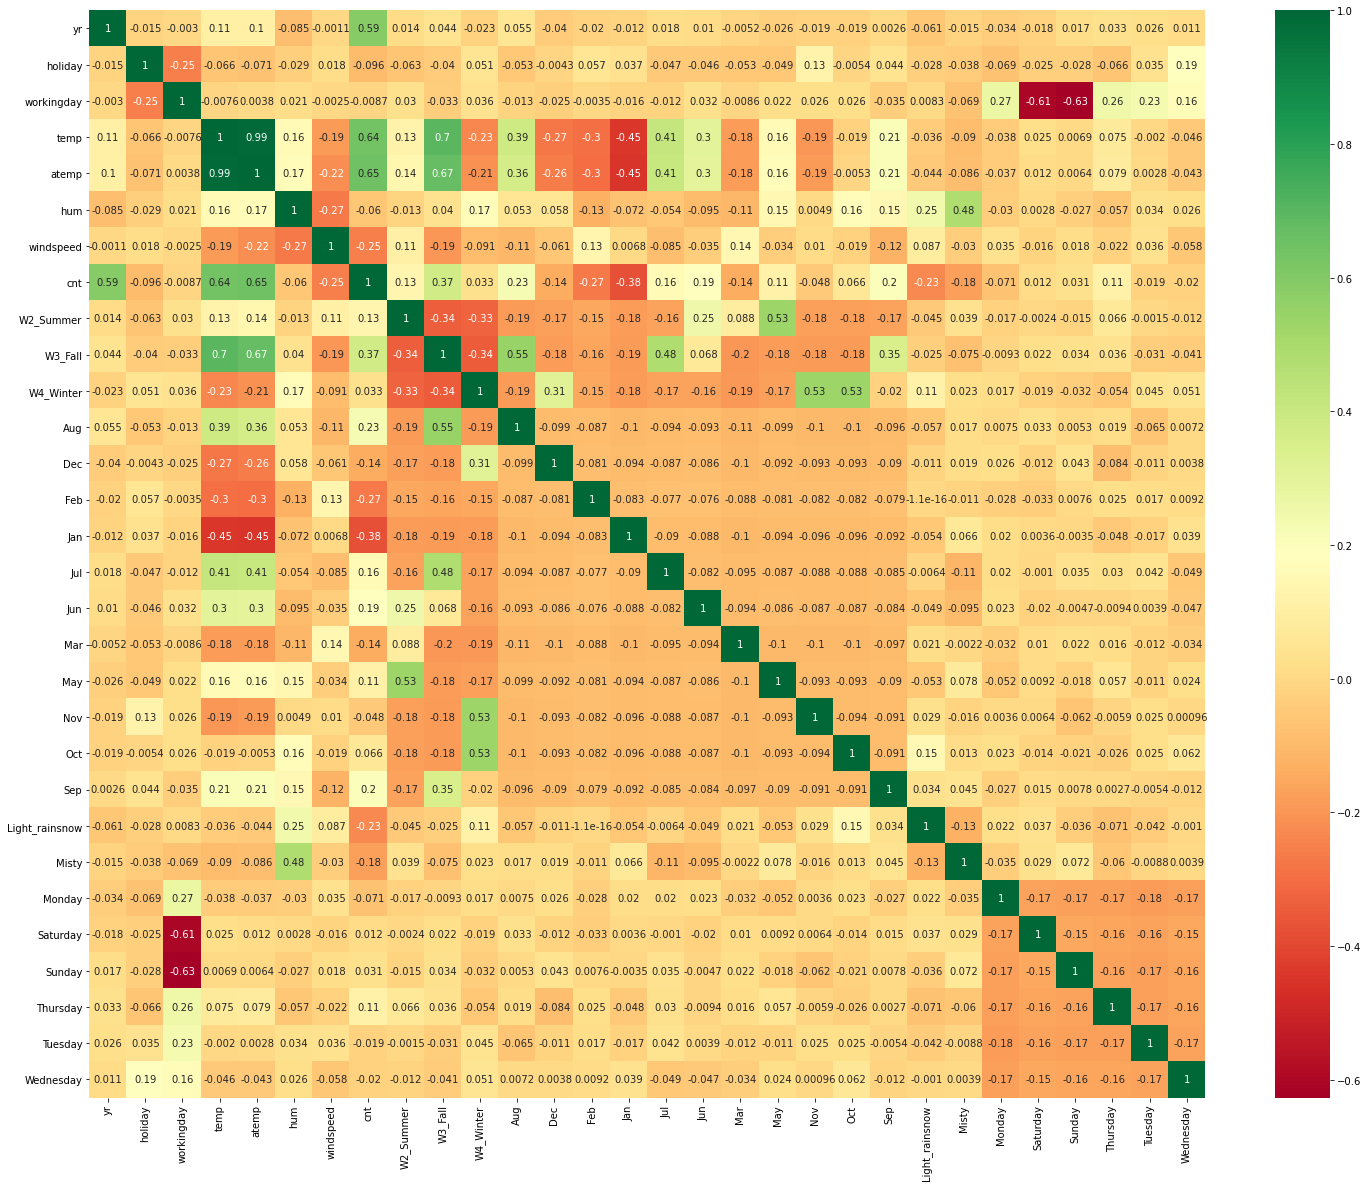

In [38]:
plt.figure(figsize=(25,20))
sns.heatmap(day_train.corr(),annot=True,cmap='RdYlGn')
plt.show()

In [39]:
y_train=day_train.pop('cnt')
X_train=day_train

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [41]:
lm=LinearRegression()

In [42]:
lm.fit(X_train,y_train)

LinearRegression()

In [43]:
rfe=RFE(lm,15)
rfe=rfe.fit(X_train,y_train)

In [44]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('W2_Summer', True, 1),
 ('W3_Fall', True, 1),
 ('W4_Winter', True, 1),
 ('Aug', False, 10),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 14),
 ('Mar', False, 15),
 ('May', False, 7),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Light_rainsnow', True, 1),
 ('Misty', True, 1),
 ('Monday', False, 9),
 ('Saturday', False, 4),
 ('Sunday', False, 5),
 ('Thursday', False, 13),
 ('Tuesday', False, 8),
 ('Wednesday', False, 11)]

In [45]:
col=X_train.columns[rfe.support_]

In [46]:
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'W2_Summer', 'W3_Fall',
       'W4_Winter', 'Dec', 'Jan', 'Jul', 'Nov', 'Sep', 'Light_rainsnow',
       'Misty'],
      dtype='object')

In [47]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'Aug', 'Feb', 'Jun', 'Mar', 'May', 'Oct',
       'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [48]:
X_train_rfe=X_train[col]

In [49]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [50]:
def calculateVIF(df):
    vif=pd.DataFrame()
    vif['Feature']=df.columns
    vif['VIF']=[variance_inflation_factor(df.values,i)
for i in range (df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [51]:
calculateVIF(X_train_rfe)

,Feature,VIF
2,temp,27.14
3,hum,21.12
6,W3_Fall,7.52
7,W4_Winter,4.07
4,windspeed,3.73
5,W2_Summer,3.65
14,Misty,2.19
0,yr,2.05
11,Nov,1.89
9,Jan,1.63


In [52]:
X_train_lm1=sm.add_constant(X_train_rfe)
lr1=sm.OLS(y_train,X_train_lm1).fit()
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Fri, 17 Sep 2021   Prob (F-statistic):          3.34e-189
Time:                        23:25:35   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2585      0.029      9.

In [53]:
calculateVIF(X_train_rfe)

,Feature,VIF
2,temp,27.14
3,hum,21.12
6,W3_Fall,7.52
7,W4_Winter,4.07
4,windspeed,3.73
5,W2_Summer,3.65
14,Misty,2.19
0,yr,2.05
11,Nov,1.89
9,Jan,1.63


In [54]:
X_train_new = X_train_rfe.drop(['hum'], axis = 1)
calculateVIF(X_train_new)

,Feature,VIF
2,temp,14.98
5,W3_Fall,7.28
6,W4_Winter,3.99
4,W2_Summer,3.65
3,windspeed,3.57
0,yr,2.05
10,Nov,1.84
9,Jul,1.59
13,Misty,1.54
11,Sep,1.43


In [55]:
X_train_lm2=sm.add_constant(X_train_new)
lr2=sm.OLS(y_train,X_train_lm2).fit()
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Fri, 17 Sep 2021   Prob (F-statistic):          1.57e-186
Time:                        23:25:36   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1750      0.021      8.

In [56]:
X_train_new = X_train_new.drop(['W3_Fall'], axis = 1)
calculateVIF(X_train_new)

,Feature,VIF
2,temp,5.17
3,windspeed,3.42
5,W4_Winter,2.52
0,yr,2.04
4,W2_Summer,1.82
9,Nov,1.80
12,Misty,1.54
8,Jul,1.52
6,Dec,1.40
10,Sep,1.31


In [57]:
X_train_lm3=sm.add_constant(X_train_new)
lr3=sm.OLS(y_train,X_train_lm3).fit()
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     194.9
Date:                Fri, 17 Sep 2021   Prob (F-statistic):          2.65e-185
Time:                        23:25:36   Log-Likelihood:                 499.93
No. Observations:                 510   AIC:                            -971.9
Df Residuals:                     496   BIC:                            -912.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1650      0.021      7.

In [58]:
X_train_new = X_train_new.drop(['Nov'], axis = 1)
calculateVIF(X_train_new)

,Feature,VIF
2,temp,5.14
3,windspeed,3.37
0,yr,2.04
4,W2_Summer,1.82
5,W4_Winter,1.66
11,Misty,1.54
8,Jul,1.52
9,Sep,1.30
6,Dec,1.23
7,Jan,1.22


In [59]:
X_train_lm4=sm.add_constant(X_train_new)
lr4=sm.OLS(y_train,X_train_lm4).fit()
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     210.2
Date:                Fri, 17 Sep 2021   Prob (F-statistic):          6.40e-186
Time:                        23:25:37   Log-Likelihood:                 498.62
No. Observations:                 510   AIC:                            -971.2
Df Residuals:                     497   BIC:                            -916.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1590      0.021      7.

In [60]:
X_train_new = X_train_new.drop(['Dec'], axis = 1)
calculateVIF(X_train_new)

,Feature,VIF
2,temp,5.13
3,windspeed,3.33
0,yr,2.04
4,W2_Summer,1.82
10,Misty,1.53
7,Jul,1.52
5,W4_Winter,1.51
8,Sep,1.29
6,Jan,1.22
9,Light_rainsnow,1.08


In [61]:
X_train_lm5=sm.add_constant(X_train_new)
lr5=sm.OLS(y_train,X_train_lm5).fit()
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.3
Date:                Fri, 17 Sep 2021   Prob (F-statistic):          1.63e-186
Time:                        23:25:38   Log-Likelihood:                 497.21
No. Observations:                 510   AIC:                            -970.4
Df Residuals:                     498   BIC:                            -919.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1481      0.020      7.

In [62]:
lr5.params

const             0.148135
yr                0.233087
holiday          -0.099447
temp              0.540788
windspeed        -0.161514
W2_Summer         0.072212
W4_Winter         0.115269
Jan              -0.044248
Jul              -0.039785
Sep               0.089779
Light_rainsnow   -0.284463
Misty            -0.079840
dtype: float64

In [63]:
### cnt=0.14+(0.23*yr)-(0.09*holiday)+(0.54*temp)-(0.16*windspeed)+(0.07*W2_Summer)+(0.11*W4_Winter)-(0.04*Jan)+(0.03*Jul)+(0.08*Sep)-(0.28*Light_rainsnow)-(0.07Misty)

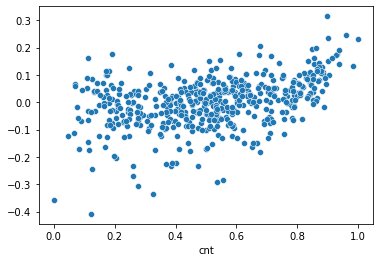

In [64]:
y_train_pred=lr5.predict(X_train_lm5)
res=y_train-y_train_pred
sns.scatterplot(y_train,res)
plt.show()


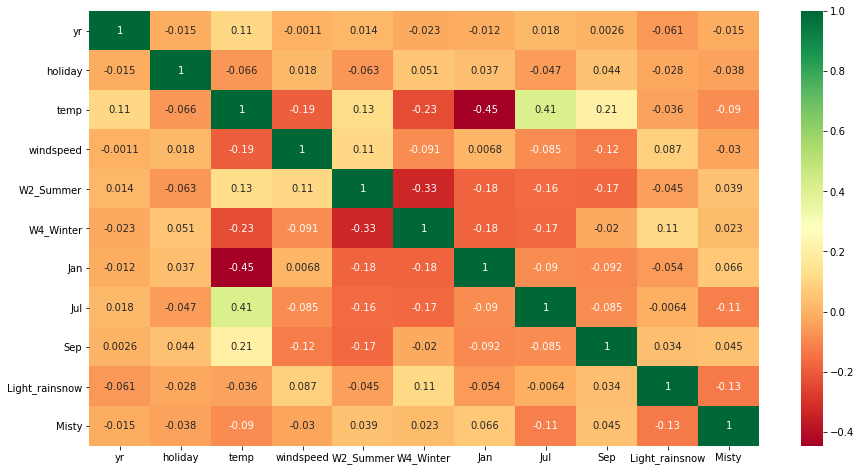

In [65]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

In [66]:
calculateVIF(X_train_new)

,Feature,VIF
2,temp,5.13
3,windspeed,3.33
0,yr,2.04
4,W2_Summer,1.82
10,Misty,1.53
7,Jul,1.52
5,W4_Winter,1.51
8,Sep,1.29
6,Jan,1.22
9,Light_rainsnow,1.08


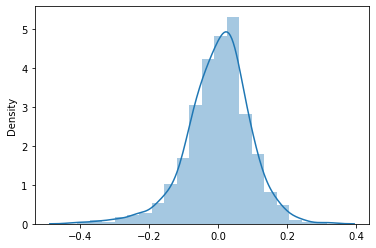

In [67]:
fig = plt.figure()
sns.distplot((res), bins = 20)                    
plt.show()

In [68]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
day_test[num_vars] = scaler.transform(day_test[num_vars])
day_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,W2_Summer,W3_Fall,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,...,0,0,0,1,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,1,0,1,0,0,0,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,1,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,1,0,...,0,0,0,0,0,1,0,0,0,0


In [69]:
y_test = day_test.pop('cnt')
X_test = day_test

In [70]:
col1=X_train_new.columns

X_test=X_test[col1]

X_test_lm5 = sm.add_constant(X_test)

X_test_lm5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   const           219 non-null    float64
 1   yr              219 non-null    int64  
 2   holiday         219 non-null    int64  
 3   temp            219 non-null    float64
 4   windspeed       219 non-null    float64
 5   W2_Summer       219 non-null    uint8  
 6   W4_Winter       219 non-null    uint8  
 7   Jan             219 non-null    uint8  
 8   Jul             219 non-null    uint8  
 9   Sep             219 non-null    uint8  
 10  Light_rainsnow  219 non-null    uint8  
 11  Misty           219 non-null    uint8  
dtypes: float64(3), int64(2), uint8(7)
memory usage: 11.8 KB


In [71]:
y_pred = lr5.predict(X_test_lm5)

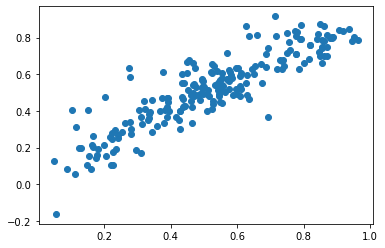

In [72]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
plt.show()

In [73]:
from sklearn.metrics import r2_score

In [74]:
r2 = round(r2_score(y_test, y_pred),4)
r2

0.7912